<a href="https://colab.research.google.com/github/mollah2022/Neural-Network/blob/main/Machine_Learning_Implementation_for_Profit_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/profit_companies_bangladesh.csv')

In [31]:
df.head()

,R&D Spend,Administration,Marketing Spend,Division,Profit
0,1353434.02,1332996.50,8975833.09,Mymensingh,4783913.80
1,11555444.22,1207638.19,1494478.07,Khulna,9727203.06
2,8265094.30,7592749.55,3113983.44,Rangpur,9009004.39
3,15553306.47,2366144.40,4717543.19,Khulna,13828724.14
4,1249300.09,475396.50,11138107.61,Khulna,6398495.90


In [32]:
df.shape

(3000, 5)

In [33]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
Division,0
Profit,0


In [34]:
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
Division,0
Profit,0


In [35]:
df.duplicated().value_counts()

,count
False,3000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        3000 non-null   float64
 1   Administration   3000 non-null   float64
 2   Marketing Spend  3000 non-null   float64
 3   Division         3000 non-null   object 
 4   Profit           3000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [37]:
x = df.drop(["Profit"],axis = 1)

In [38]:
x

,R&D Spend,Administration,Marketing Spend,Division
0,1353434.02,1332996.50,8975833.09,Mymensingh
1,11555444.22,1207638.19,1494478.07,Khulna
2,8265094.30,7592749.55,3113983.44,Rangpur
3,15553306.47,2366144.40,4717543.19,Khulna
4,1249300.09,475396.50,11138107.61,Khulna
...,...,...,...,...
2995,16427990.52,2960171.09,12827947.12,Barishal
2996,10580540.14,9009014.60,10843648.75,Barishal
2997,11406240.56,7780367.12,12036031.21,Sylhet
2998,13599475.23,8737770.16,14150876.60,Barishal


In [39]:
y = df["Profit"]
y

,Profit
0,4783913.80
1,9727203.06
2,9009004.39
3,13828724.14
4,6398495.90
...,...
2995,18769022.67
2996,14597794.24
2997,15273696.20
2998,18855798.61


In [40]:
city = pd.get_dummies(x['Division'],drop_first=True)
city

,Chattogram,Dhaka,Khulna,Mymensingh,Rajshahi,Rangpur,Sylhet
0,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,True
2998,False,False,False,False,False,False,False


In [41]:
x = x.drop(['Division'],axis = 1)
x

,R&D Spend,Administration,Marketing Spend
0,1353434.02,1332996.50,8975833.09
1,11555444.22,1207638.19,1494478.07
2,8265094.30,7592749.55,3113983.44
3,15553306.47,2366144.40,4717543.19
4,1249300.09,475396.50,11138107.61
...,...,...,...
2995,16427990.52,2960171.09,12827947.12
2996,10580540.14,9009014.60,10843648.75
2997,11406240.56,7780367.12,12036031.21
2998,13599475.23,8737770.16,14150876.60


In [42]:
x = pd.concat([x,city],axis = 1)
x

,R&D Spend,Administration,Marketing Spend,Chattogram,Dhaka,Khulna,Mymensingh,Rajshahi,Rangpur,Sylhet
0,1353434.02,1332996.50,8975833.09,False,False,False,True,False,False,False
1,11555444.22,1207638.19,1494478.07,False,False,True,False,False,False,False
2,8265094.30,7592749.55,3113983.44,False,False,False,False,False,True,False
3,15553306.47,2366144.40,4717543.19,False,False,True,False,False,False,False
4,1249300.09,475396.50,11138107.61,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2995,16427990.52,2960171.09,12827947.12,False,False,False,False,False,False,False
2996,10580540.14,9009014.60,10843648.75,False,False,False,False,False,False,False
2997,11406240.56,7780367.12,12036031.21,False,False,False,False,False,False,True
2998,13599475.23,8737770.16,14150876.60,False,False,False,False,False,False,False


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [44]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [51]:
# Predictions
y_pred_train = regression.predict(x_train)
y_pred_test = regression.predict(x_test)

In [62]:
y_pred_train

array([10055127.7448558 ,  8909043.35170476, 11131682.81599656, ...,
       11976142.82297463, 12449319.91695533,  9172159.91243765])

In [63]:
y_pred_test

array([ 5008133.14509343, 17753661.93566064, 17258860.55689429,
        6310801.73747228, 14287871.39292775, 17652044.0259888 ,
       10610628.35305054,  9934951.2541809 , 10349096.01381034,
       17633505.17656815, 14907858.42991063,  7022518.50525301,
       17530445.92938564,  3365540.43901255,  1145685.82913772,
       14571603.74114529, 14008598.90871964, 15318407.22358226,
       14299737.34900316, 17571496.70128538, 18367885.37303059,
       14852264.79184613,  7174041.61437955,  7042900.602507  ,
        8720946.86338969,  9265812.18827899, 18250017.42430133,
       10122908.3458216 , 18561576.17719886, 13986745.11634269,
       19438636.31931701,  5057295.16260096,  8886324.24518755,
       14476524.93153588, 16036386.19771987, 17139384.6191799 ,
        7957606.37627845,  9285556.37599479, 21606954.5142628 ,
       11927196.30068093, 13091177.27651048, 13432320.24479501,
        7783307.50124647,  4397972.44141727, 16823543.65185493,
       11712078.50021295,  7656522.85949

In [52]:
# Calculate losses (MSE)
train_loss = mean_squared_error(y_train, y_pred_train)
test_loss = mean_squared_error(y_test, y_pred_test)

In [64]:
train_loss

244466377814.61282

In [65]:
test_loss

207626810976.01117

In [54]:
# R² scores
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

In [59]:
train_r2

0.988983003408105

In [57]:
test_r2

0.9901899330388567

Text(0, 0.5, 'MSE')

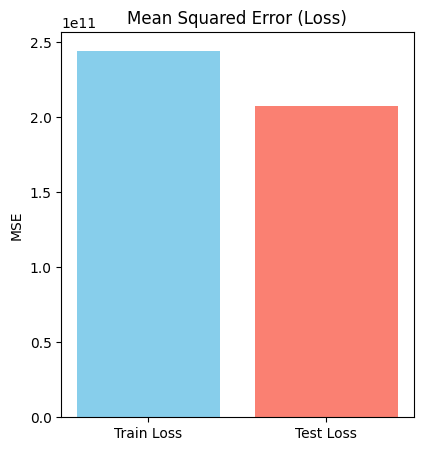

In [60]:
# Plotting Loss (MSE)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(['Train Loss', 'Test Loss'], [train_loss, test_loss], color=['skyblue', 'salmon'])
plt.title('Mean Squared Error (Loss)')
plt.ylabel('MSE')

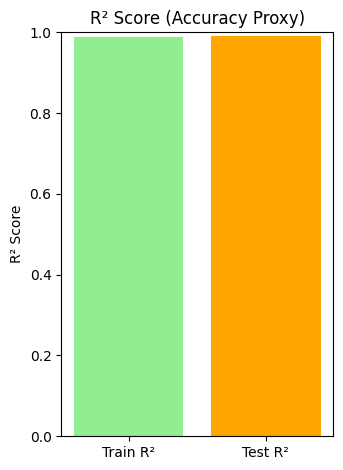

In [61]:
# Plotting R^2 Score (as Accuracy)
plt.subplot(1,2,2)
plt.bar(['Train R²', 'Test R²'], [train_r2, test_r2], color=['lightgreen', 'orange'])
plt.title('R² Score (Accuracy Proxy)')
plt.ylabel('R² Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()